# Import Libraries

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import os
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
sns.set()

In [2]:
os.getcwd()

'd:\\NoidAI\\Projects\\Ecommerce\\notebooks'

# Exploratory Data Analysis

In [3]:
df = pd.read_excel("../artifacts/raw/E Commerce Dataset.xlsx", sheet_name="E Comm", index_col=0)

In [4]:
df.head(10)

,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,,,,,,,,,,,,,,,,,,,
50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
50006,1,0.0,Computer,1,22.0,Debit Card,Female,3.0,5,Mobile Phone,5,Single,2,1,22.0,4.0,6.0,7.0,139.19
50007,1,NaN,Phone,3,11.0,Cash on Delivery,Male,2.0,3,Laptop & Accessory,2,Divorced,4,0,14.0,0.0,1.0,0.0,120.86
50008,1,NaN,Phone,1,6.0,CC,Male,3.0,3,Mobile,2,Divorced,3,1,16.0,2.0,2.0,0.0,122.93
50009,1,13.0,Phone,3,9.0,E wallet,Male,NaN,4,Mobile,3,Divorced,2,1,14.0,0.0,1.0,2.0,126.83


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5630 entries, 50001 to 55630
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        5630 non-null   int64  
 1   Tenure                       5366 non-null   float64
 2   PreferredLoginDevice         5630 non-null   object 
 3   CityTier                     5630 non-null   int64  
 4   WarehouseToHome              5379 non-null   float64
 5   PreferredPaymentMode         5630 non-null   object 
 6   Gender                       5630 non-null   object 
 7   HourSpendOnApp               5375 non-null   float64
 8   NumberOfDeviceRegistered     5630 non-null   int64  
 9   PreferedOrderCat             5630 non-null   object 
 10  SatisfactionScore            5630 non-null   int64  
 11  MaritalStatus                5630 non-null   object 
 12  NumberOfAddress              5630 non-null   int64  
 13  Complain          

In [6]:
df.isnull().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

There are missing values to handle

In [7]:
df.describe()

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,5630.000000,5366.000000,5630.000000,5379.000000,5375.000000,5630.000000,5630.000000,5630.000000,5630.000000,5365.000000,5374.000000,5372.000000,5323.000000,5630.000000
mean,0.168384,10.189899,1.654707,15.639896,2.931535,3.688988,3.066785,4.214032,0.284902,15.707922,1.751023,3.008004,4.543491,177.223030
std,0.374240,8.557241,0.915389,8.531475,0.721926,1.023999,1.380194,2.583586,0.451408,3.675485,1.894621,2.939680,3.654433,49.207036
min,0.000000,0.000000,1.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000,11.000000,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,9.000000,2.000000,3.000000,2.000000,2.000000,0.000000,13.000000,1.000000,1.000000,2.000000,145.770000
50%,0.000000,9.000000,1.000000,14.000000,3.000000,4.000000,3.000000,3.000000,0.000000,15.000000,1.000000,2.000000,3.000000,163.280000
75%,0.000000,16.000000,3.000000,20.000000,3.000000,4.000000,4.000000,6.000000,1.000000,18.000000,2.000000,3.000000,7.000000,196.392500
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,26.000000,16.000000,16.000000,46.000000,324.990000


In [8]:
df.nunique()

Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64

Two classes: stay - 0 ; leave - 1

## Visualization

We want to see certain features of customers and their behaviors such as churn, complains, order count, day since last order, order amount hike from last year.

In [9]:
 # Splitting columns into numerical and categorical columns to visualize better
categorical_columns = ["Churn", "PreferredLoginDevice", "CityTier", "PreferredPaymentMode", "Gender", "PreferedOrderCat", "MaritalStatus", "Complain"]
df_catgorical = df[categorical_columns]
df_numerical = df.drop(columns=categorical_columns[1:])
# Adding churn back to our df_numerical as it is our dependent variable

In [36]:
for features in df_catgorical.columns:
    print(f"Categories in {features} variable:     ",end=" " )
    print(df_catgorical[features].unique())


Categories in Churn variable:      [1 0]
Categories in PreferredLoginDevice variable:      ['Mobile Phone' 'Phone' 'Computer']
Categories in CityTier variable:      [3 1 2]
Categories in PreferredPaymentMode variable:      ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Categories in Gender variable:      ['Female' 'Male']
Categories in PreferedOrderCat variable:      ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Categories in MaritalStatus variable:      ['Single' 'Divorced' 'Married']
Categories in Complain variable:      [1 0]


Note: Most researchers say likert scale eg. Satisfaction score is considered a continuous variable

In [10]:
df_numerical.head()

,Churn,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
CustomerID,,,,,,,,,,,,
50001,1,4.0,6.0,3.0,3,2,9,11.0,1.0,1.0,5.0,159.93
50002,1,NaN,8.0,3.0,4,3,7,15.0,0.0,1.0,0.0,120.90
50003,1,NaN,30.0,2.0,4,3,6,14.0,0.0,1.0,3.0,120.28
50004,1,0.0,15.0,2.0,4,5,8,23.0,0.0,1.0,3.0,134.07
50005,1,0.0,12.0,NaN,3,5,3,11.0,1.0,1.0,3.0,129.60


In [11]:
df_catgorical.head()

,Churn,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,Complain
CustomerID,,,,,,,,
50001,1,Mobile Phone,3,Debit Card,Female,Laptop & Accessory,Single,1
50002,1,Phone,1,UPI,Male,Mobile,Single,1
50003,1,Phone,1,Debit Card,Male,Mobile,Single,1
50004,1,Phone,3,Debit Card,Male,Laptop & Accessory,Single,0
50005,1,Phone,1,CC,Male,Mobile,Single,0


#### Visualization : Numerical features to churn

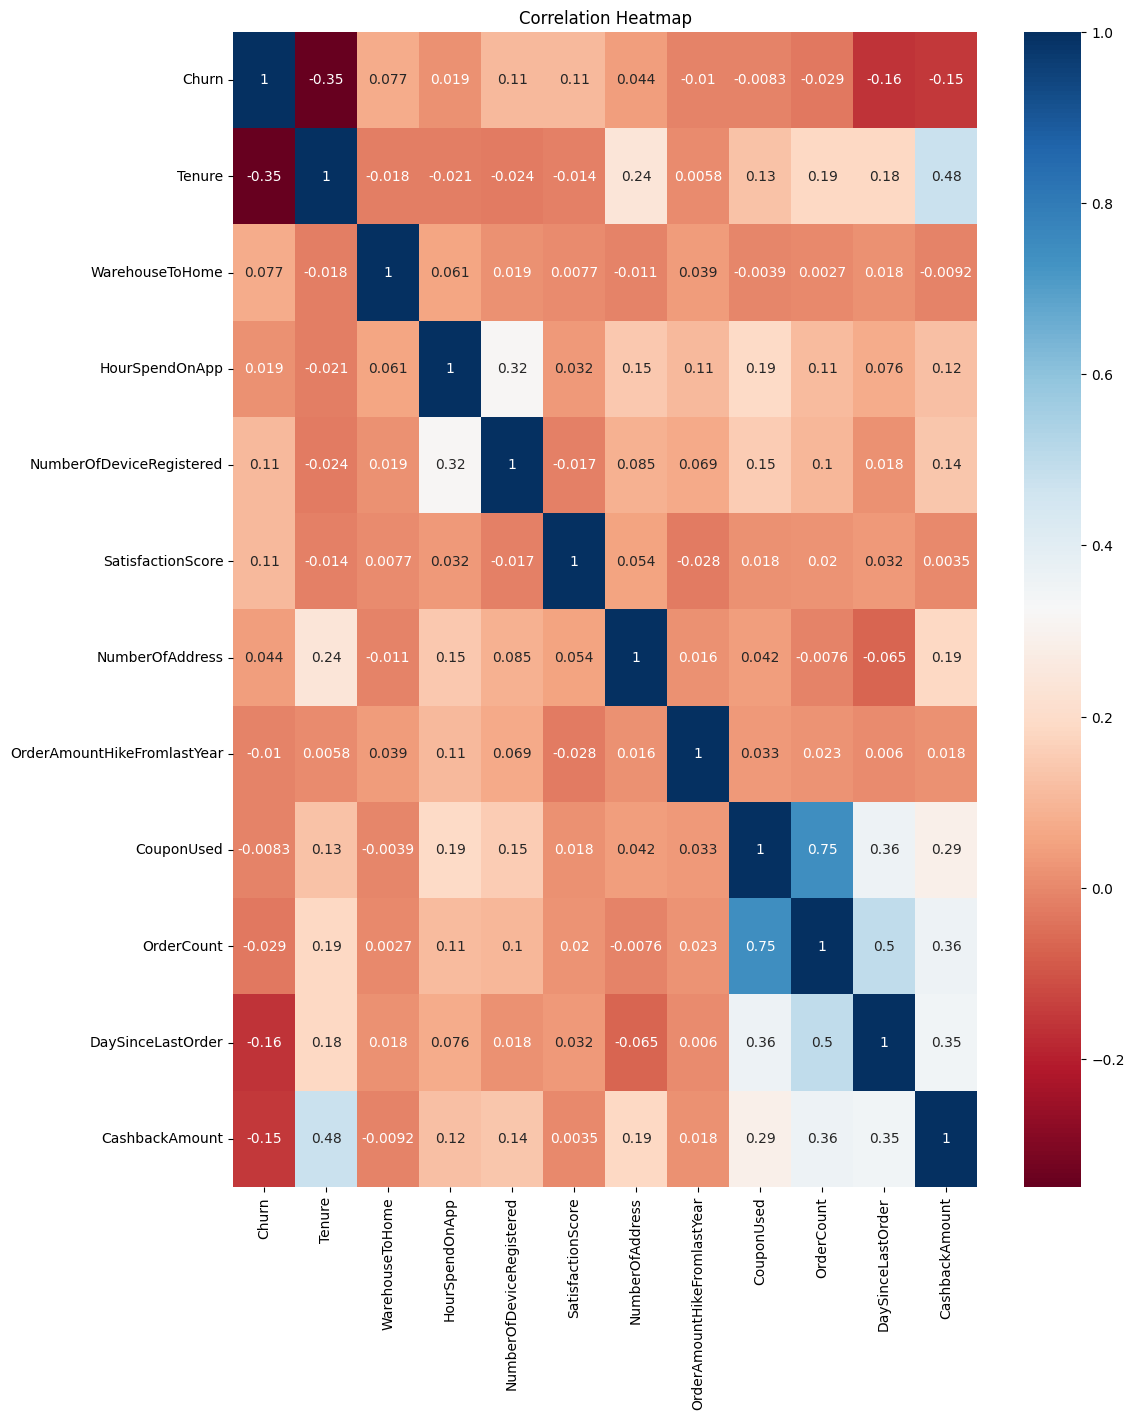

In [12]:
# Correlation Heatmap
plt.figure(figsize=(12, 15))
sns.heatmap(df_numerical.corr(),
            annot=True,
            cmap = "RdBu")
plt.title("Correlation Heatmap")
plt.show()

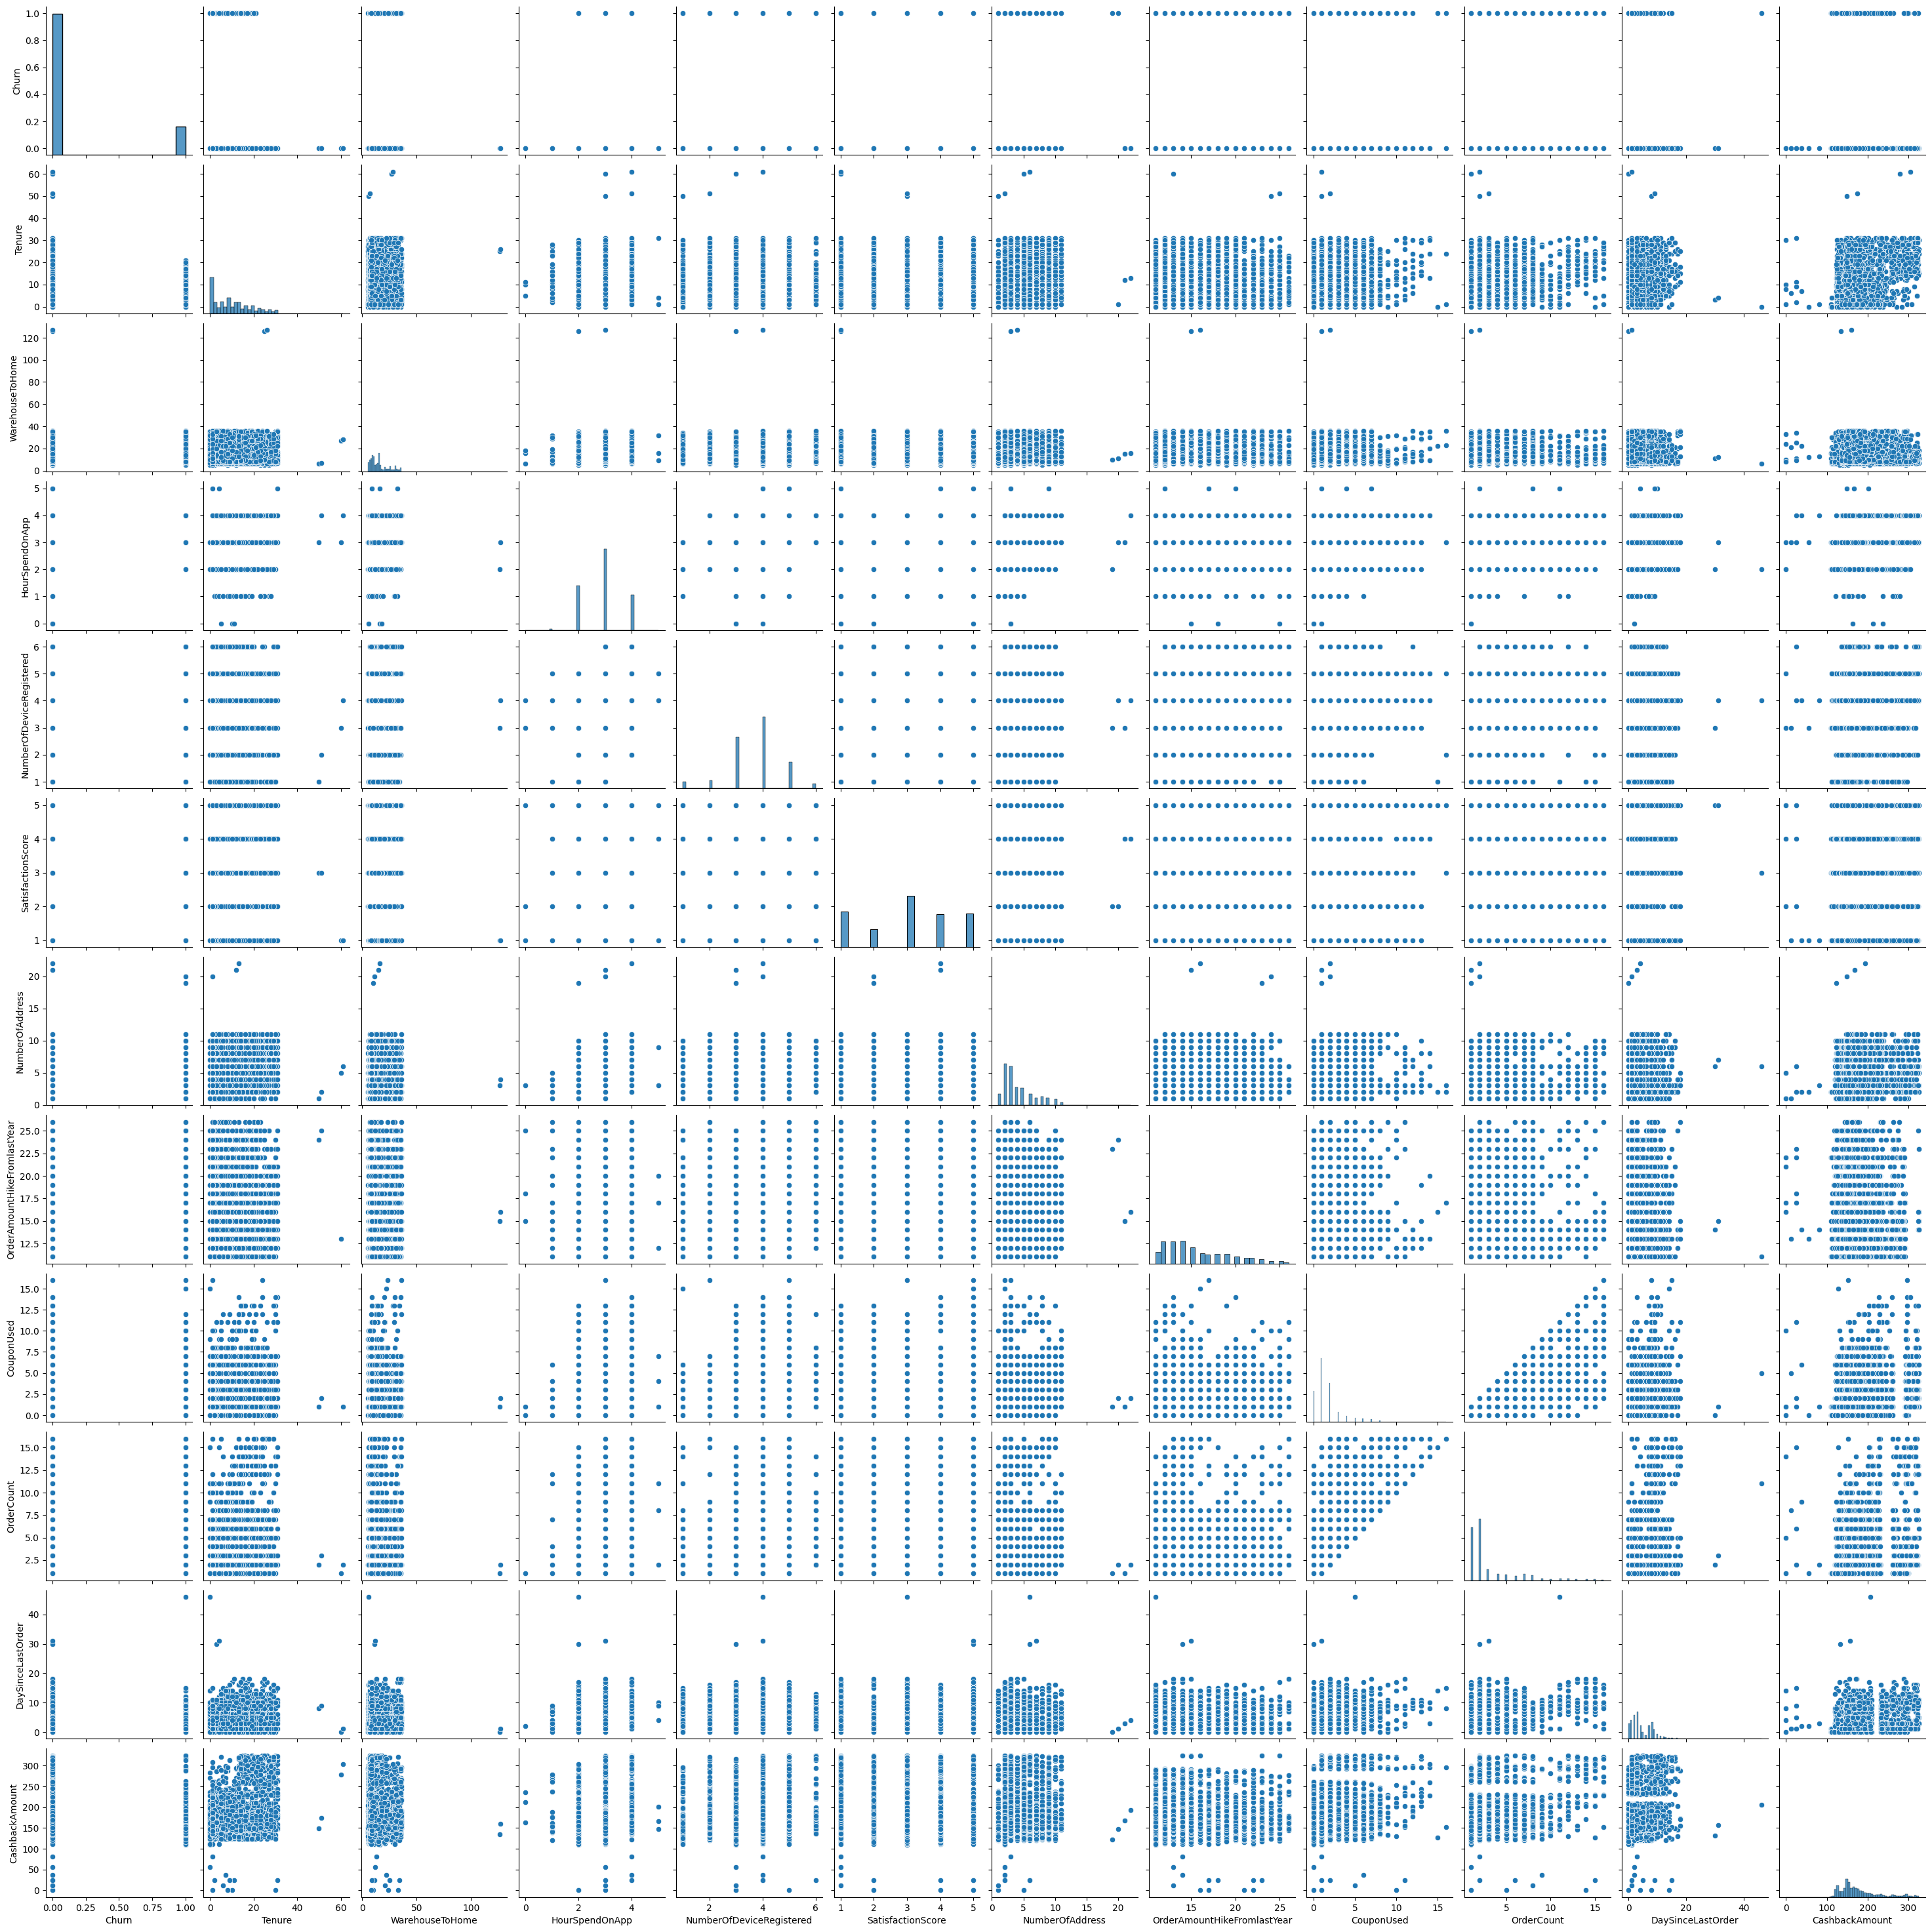

In [13]:
# Pairplot
sns.pairplot(df_numerical)

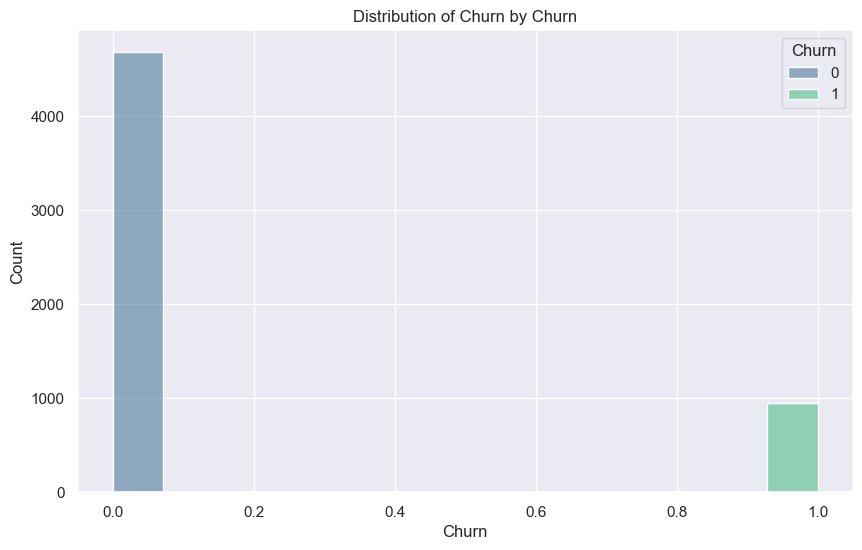

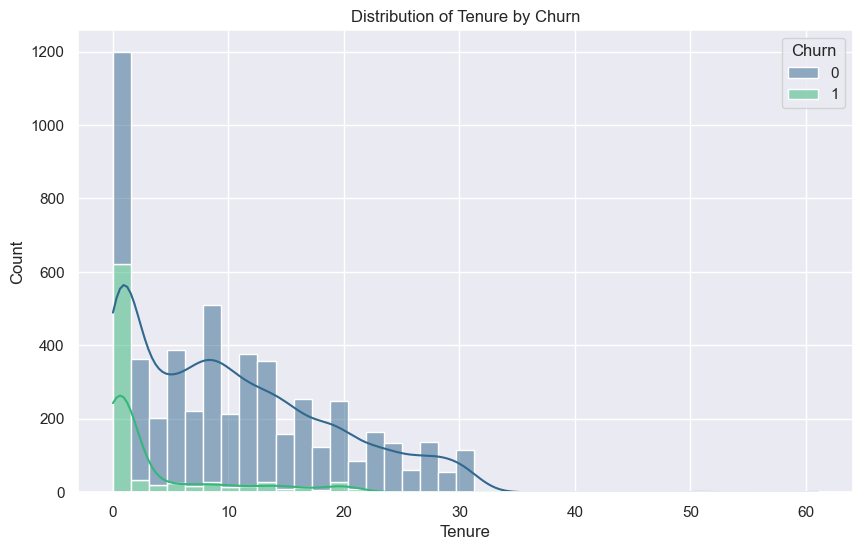

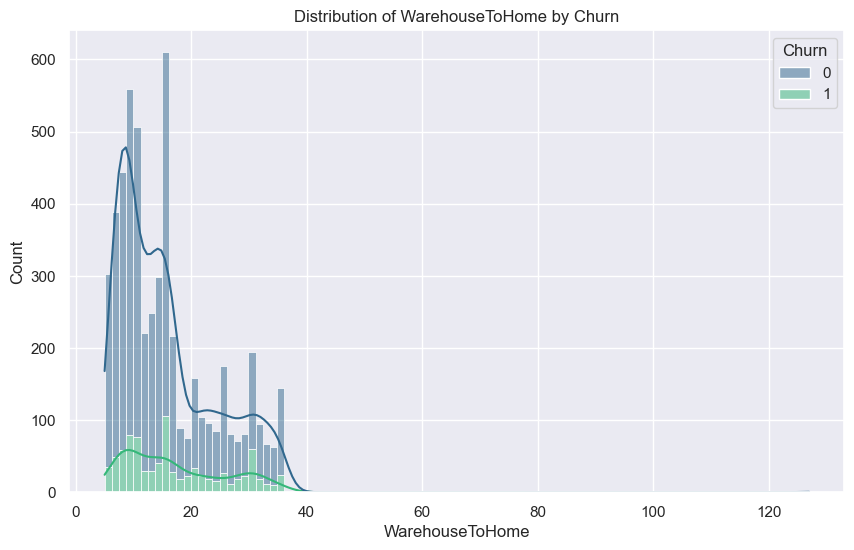

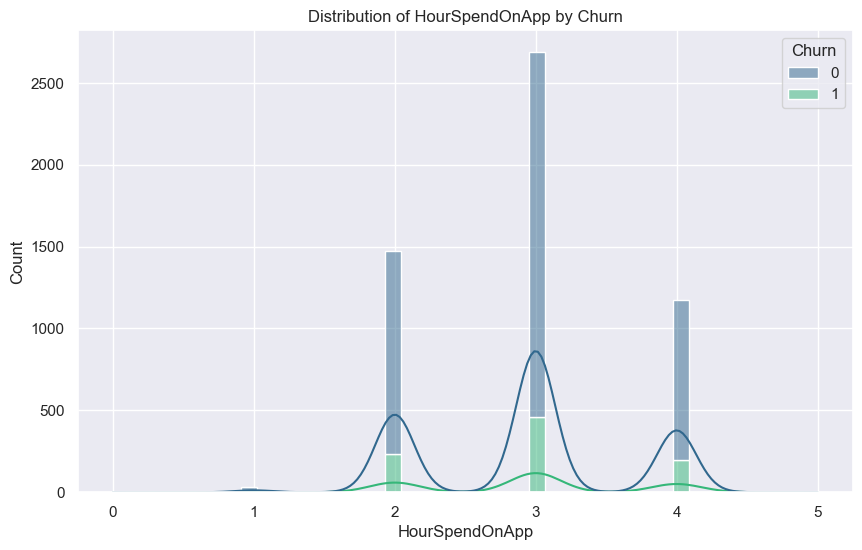

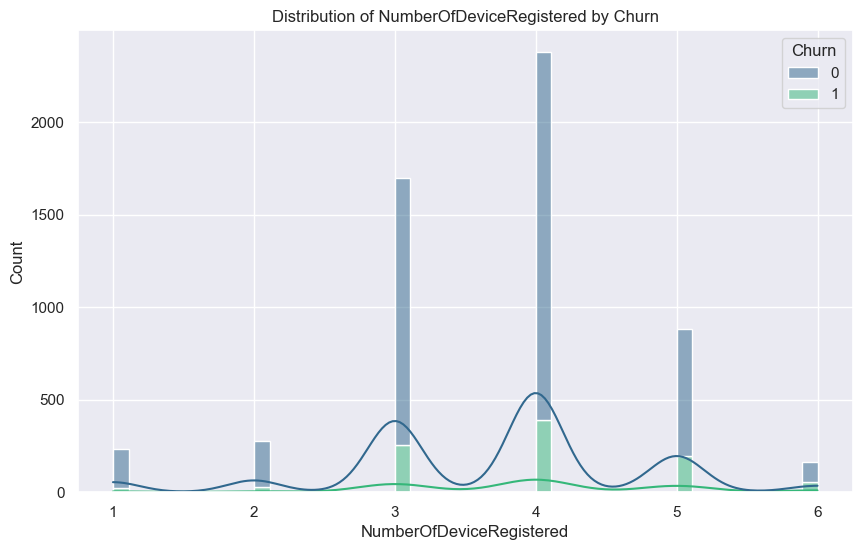

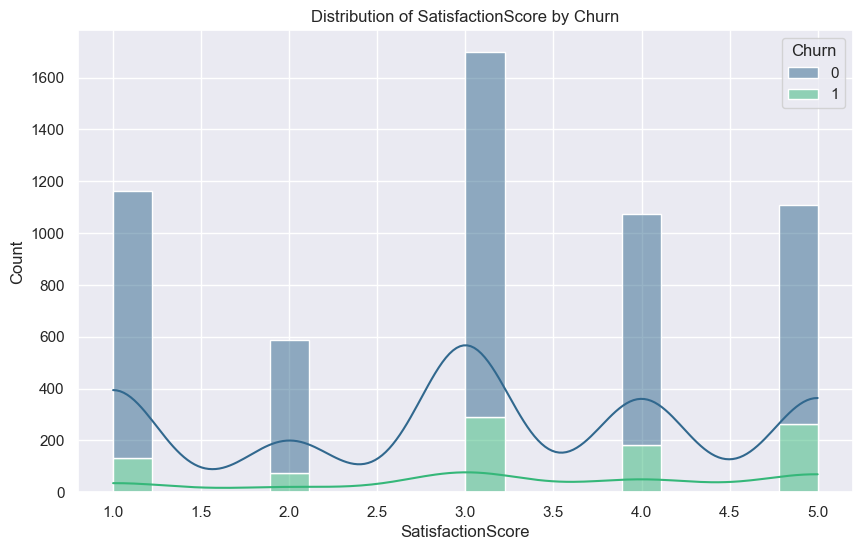

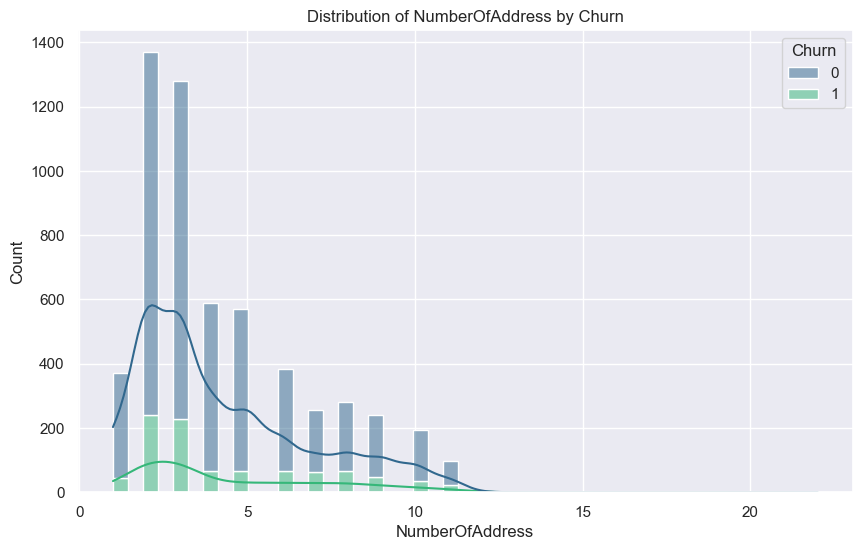

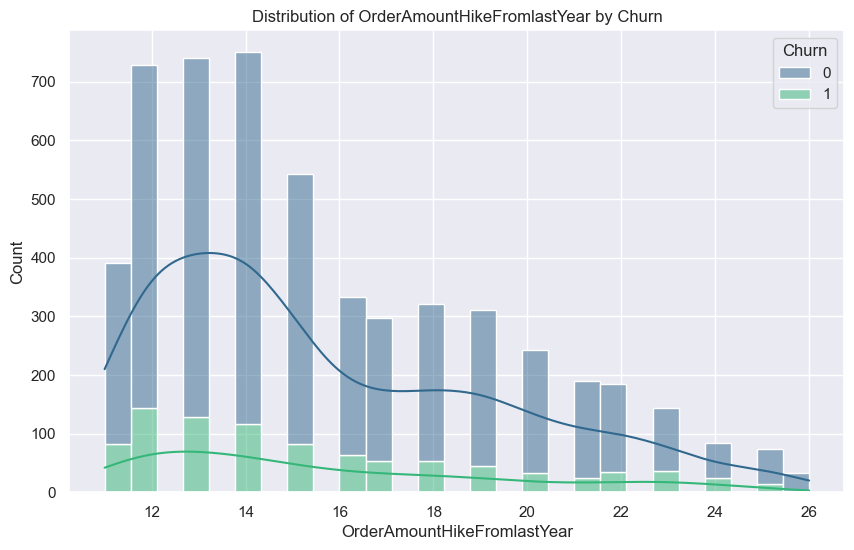

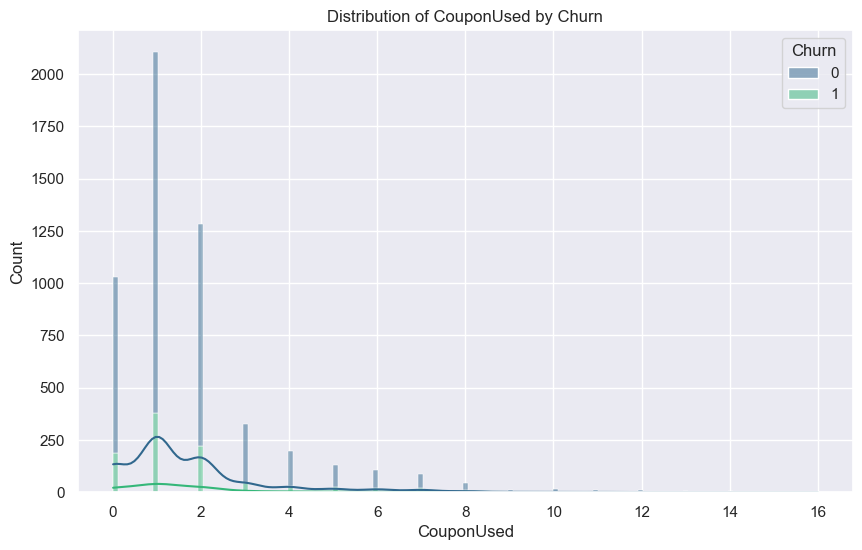

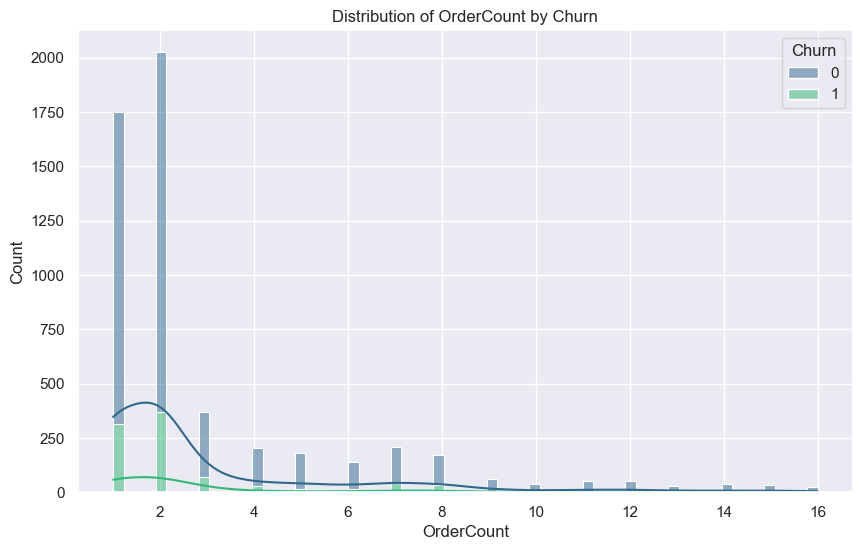

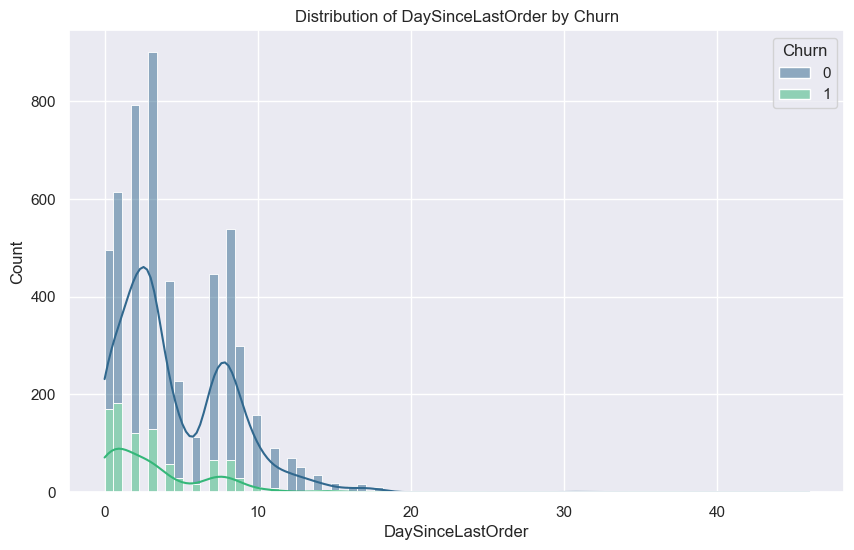

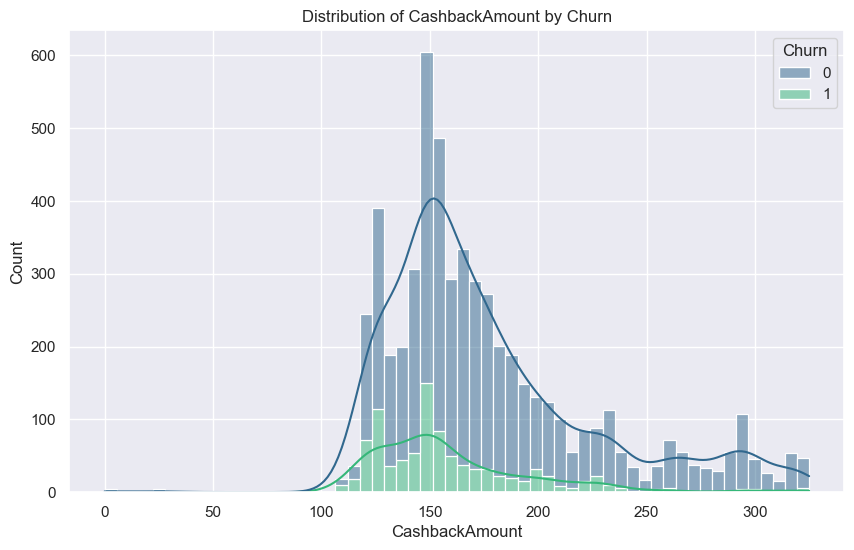

In [17]:
for feature in list(df_numerical.columns.values):
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='Churn', kde=True, multiple='stack', palette='viridis')
    plt.title(f'Distribution of {feature} by Churn')
    plt.xlabel(f'{feature}')
    plt.ylabel('Count')
    plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_13232\171416189.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df_numerical, palette='viridis')


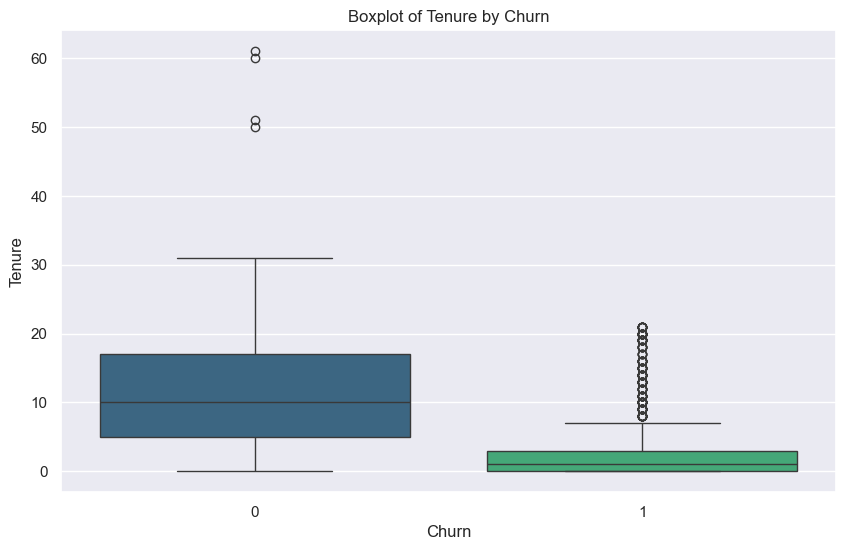

C:\Users\USER\AppData\Local\Temp\ipykernel_13232\171416189.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df_numerical, palette='viridis')


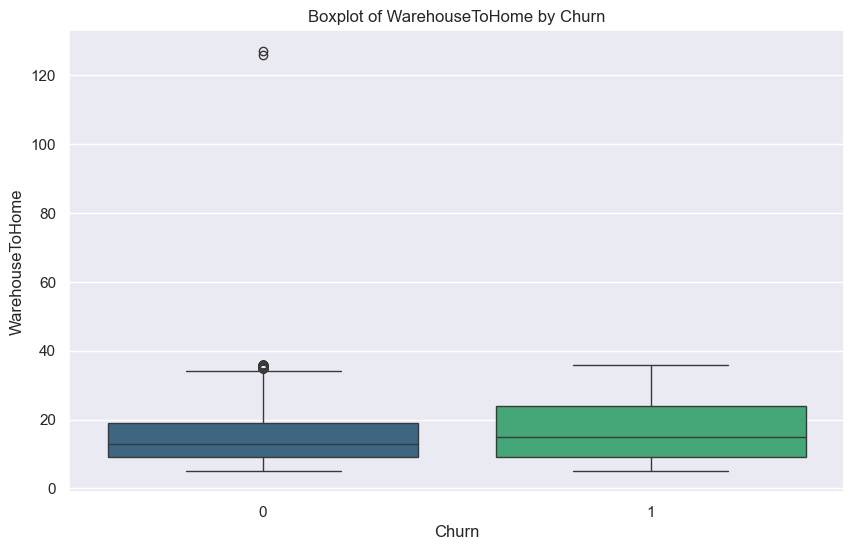

C:\Users\USER\AppData\Local\Temp\ipykernel_13232\171416189.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df_numerical, palette='viridis')


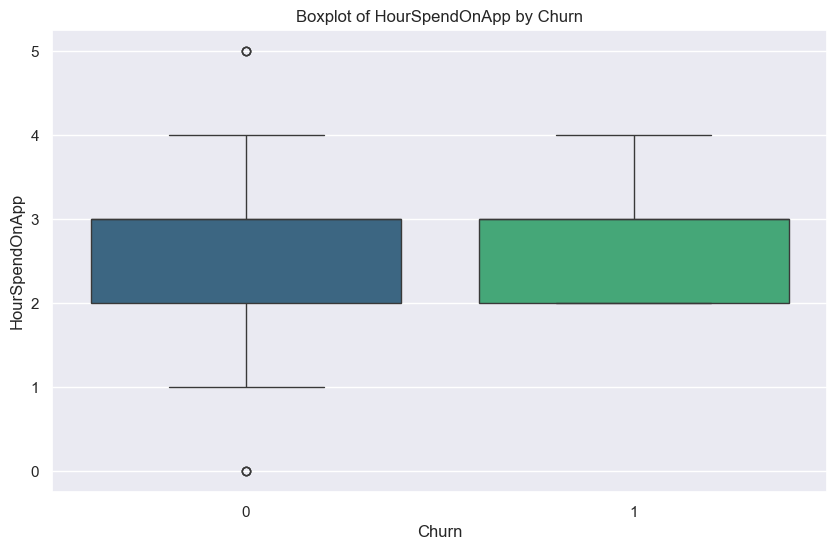

C:\Users\USER\AppData\Local\Temp\ipykernel_13232\171416189.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df_numerical, palette='viridis')


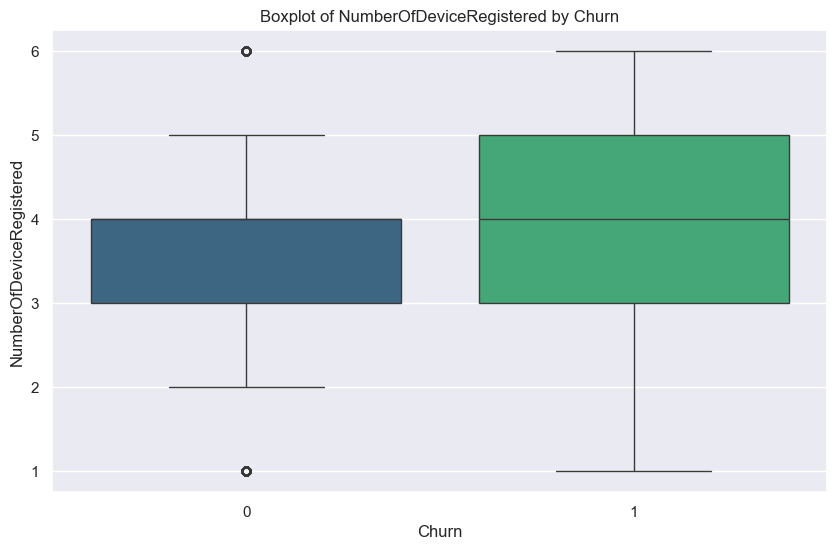

C:\Users\USER\AppData\Local\Temp\ipykernel_13232\171416189.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df_numerical, palette='viridis')


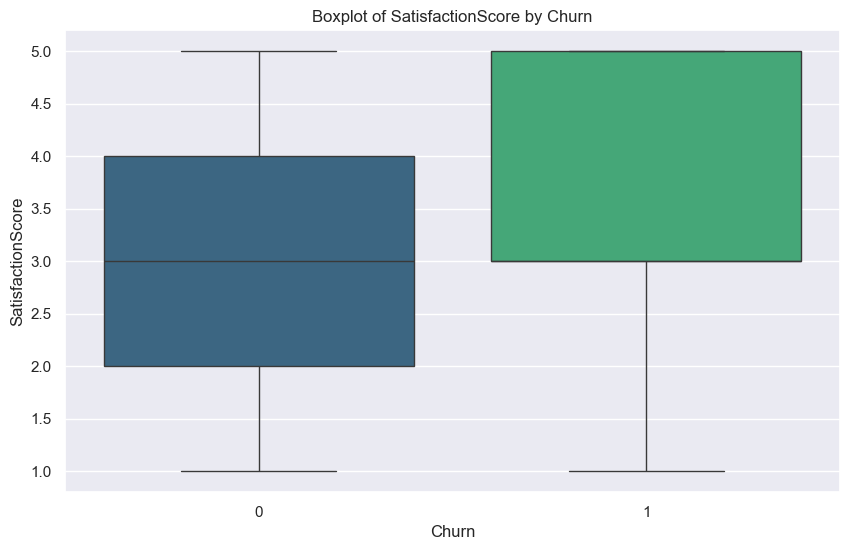

C:\Users\USER\AppData\Local\Temp\ipykernel_13232\171416189.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df_numerical, palette='viridis')


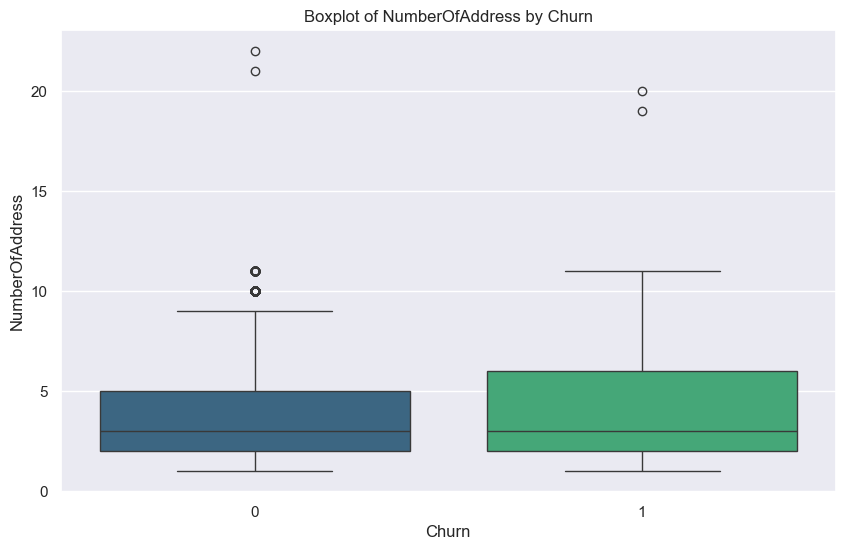

C:\Users\USER\AppData\Local\Temp\ipykernel_13232\171416189.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df_numerical, palette='viridis')


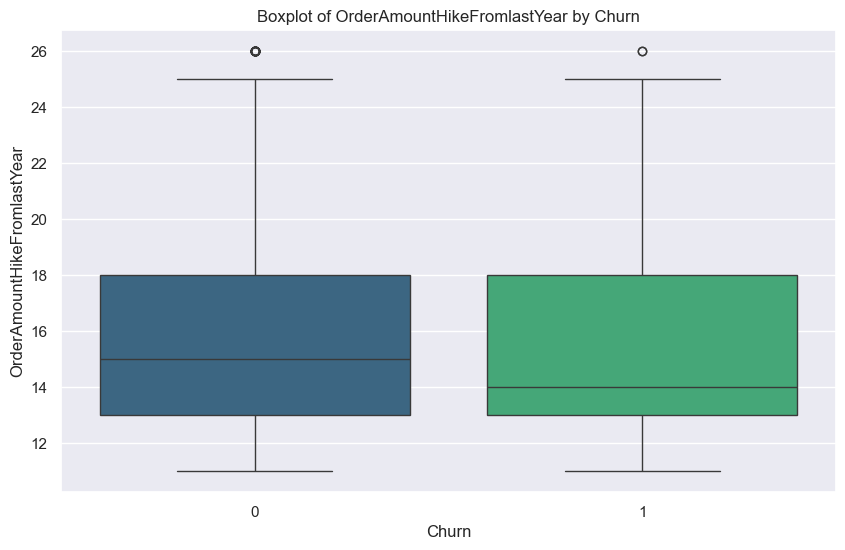

C:\Users\USER\AppData\Local\Temp\ipykernel_13232\171416189.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df_numerical, palette='viridis')


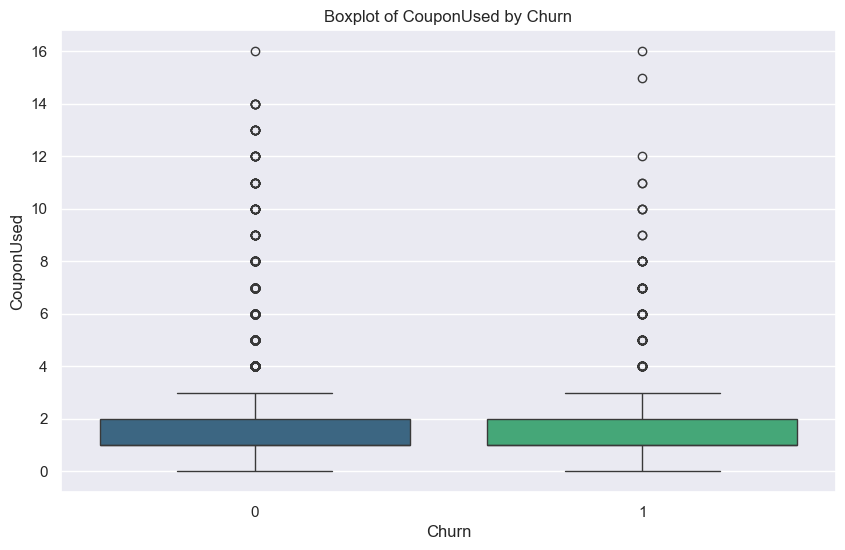

C:\Users\USER\AppData\Local\Temp\ipykernel_13232\171416189.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df_numerical, palette='viridis')


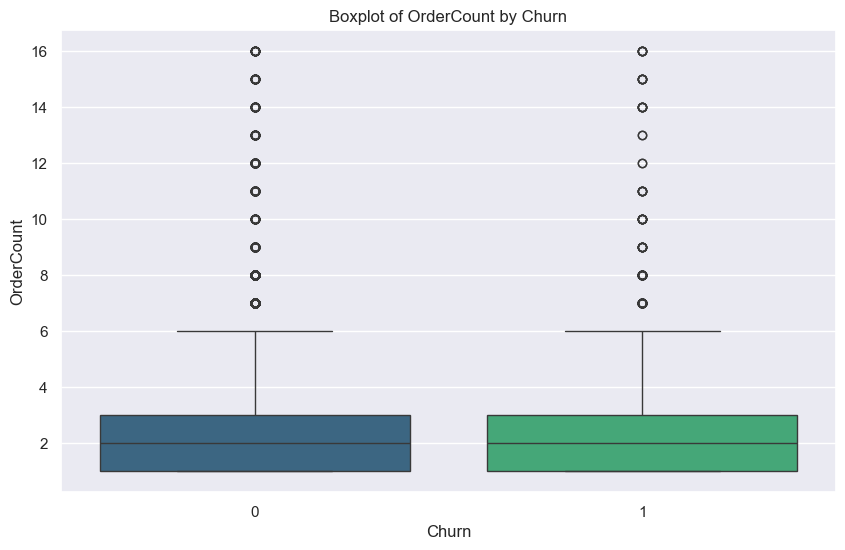

C:\Users\USER\AppData\Local\Temp\ipykernel_13232\171416189.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df_numerical, palette='viridis')


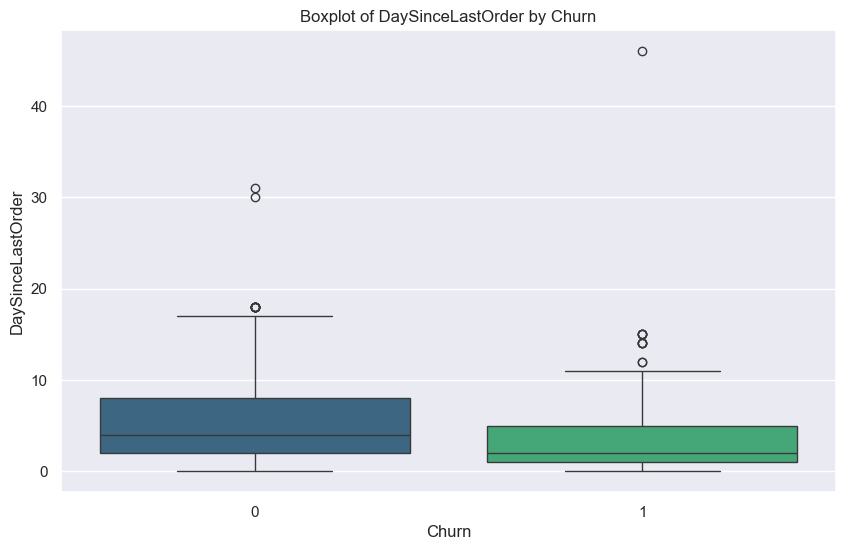

C:\Users\USER\AppData\Local\Temp\ipykernel_13232\171416189.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y=feature, data=df_numerical, palette='viridis')


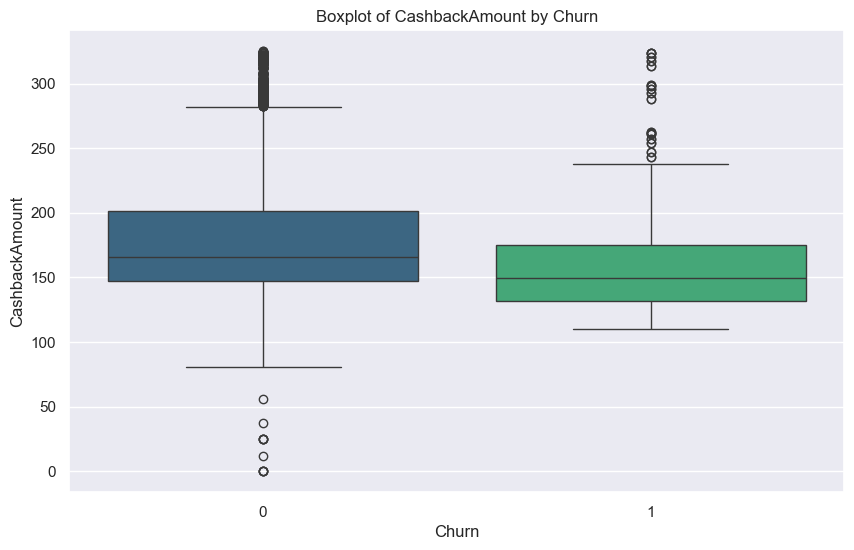

In [18]:
# Boxplot
for feature in list(df_numerical.iloc[:, 1:].columns):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Churn', y=feature, data=df_numerical, palette='viridis')
    plt.title(f'Boxplot of {feature} by Churn')
    plt.xlabel('Churn')
    plt.ylabel(f'{feature}')
    plt.show()


Interpretation
- From the plots above, we can see that only tenure and Cashback amount are correlated to Churn.
- Most of the distribution are the same between churns except for the DaySinceLastOrder feature.
- Churn Stay has around 1000 samples and Leave has around 4500, which is slightly imbalaneced but enough for our models, we shall use precision recall to measure our model's performance.
- There are outliers in our data, whether or not we remove them will depend on these criterias:
    1. Is our sample large enough? No -> Dont remove
    2. Are outliers the result of error in data collection? Most likely no -> Dont remove
    3. Are the outliers impacting the models we use? Yes (SVM, PCA, Kmeans, etc) -> Remove
    4. Are outliers crucial information? Some yes forexample orderCount have outliers mostlikely because most customers orders less than certain amount, however we keep loyal customers for analysis -> Dont Remove
    Conclusion: We have two options, Keep outliers, or make two copies of our data: with outliers and without.

#### Visualization : Categorical features to churn

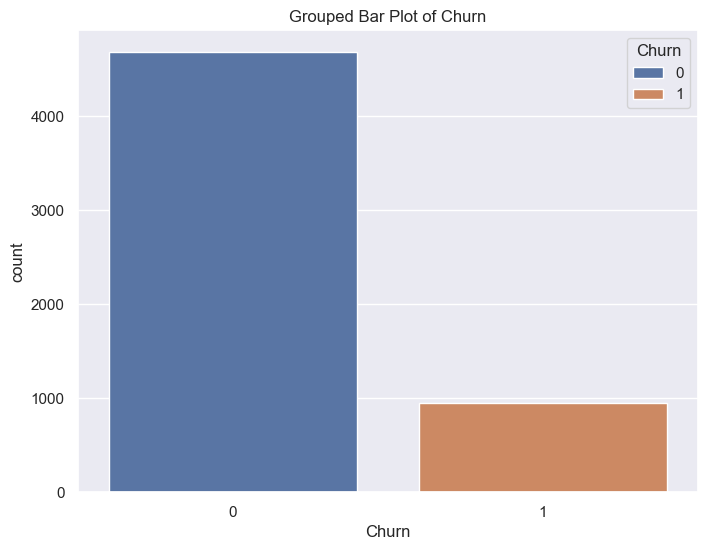

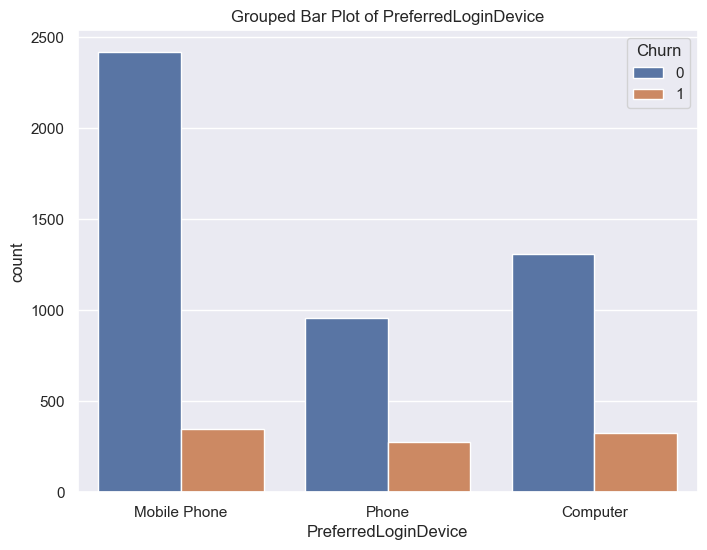

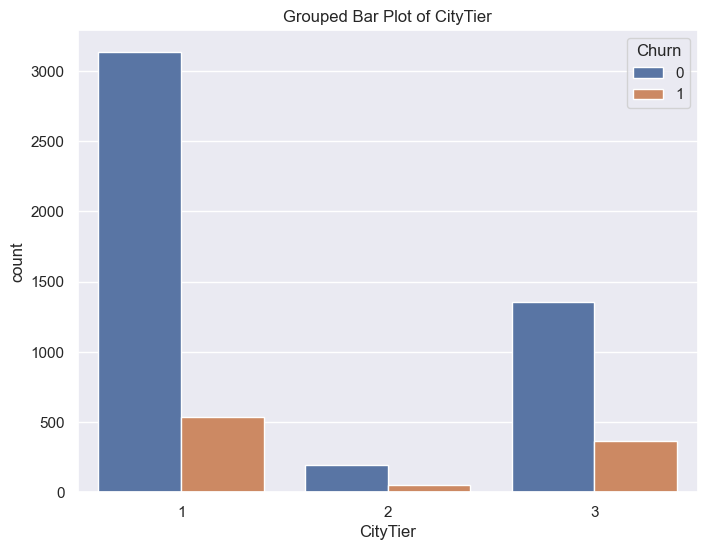

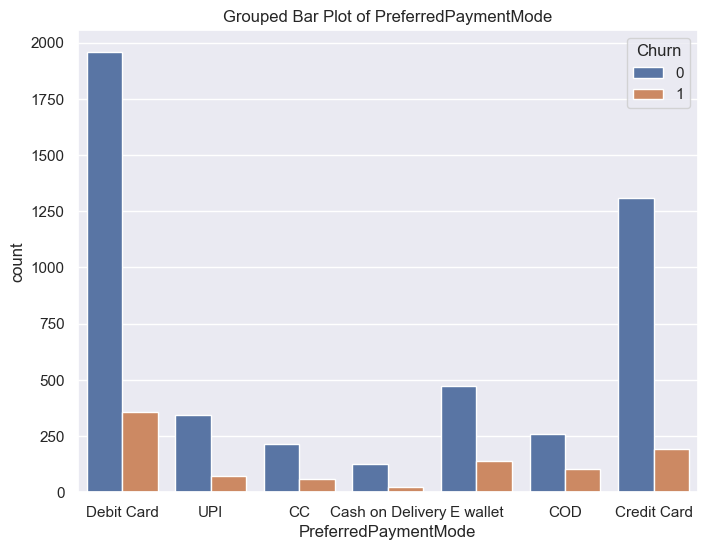

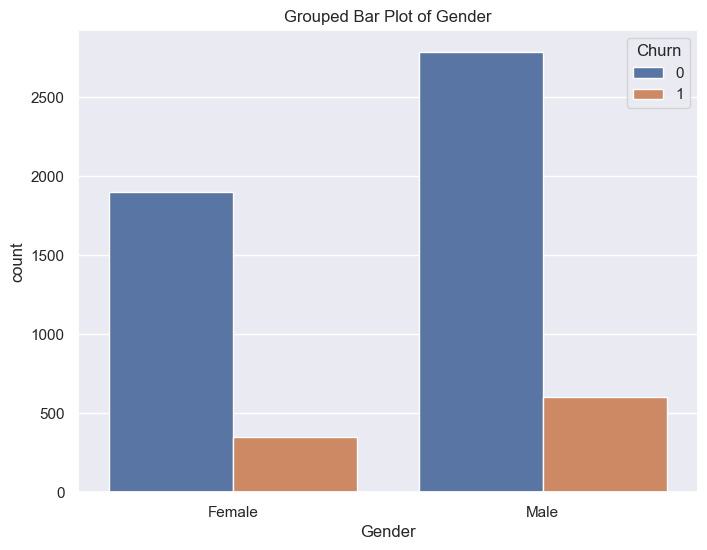

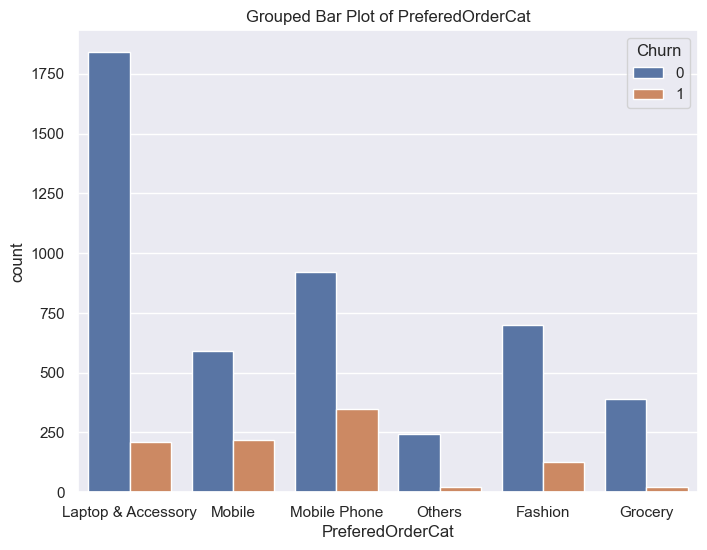

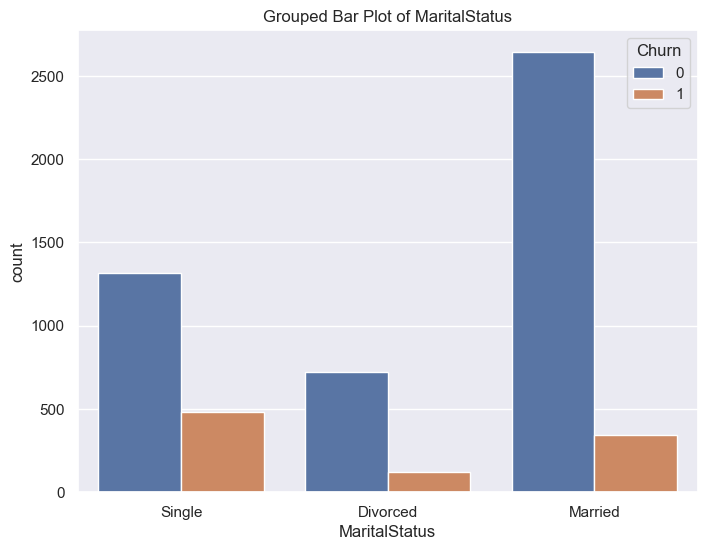

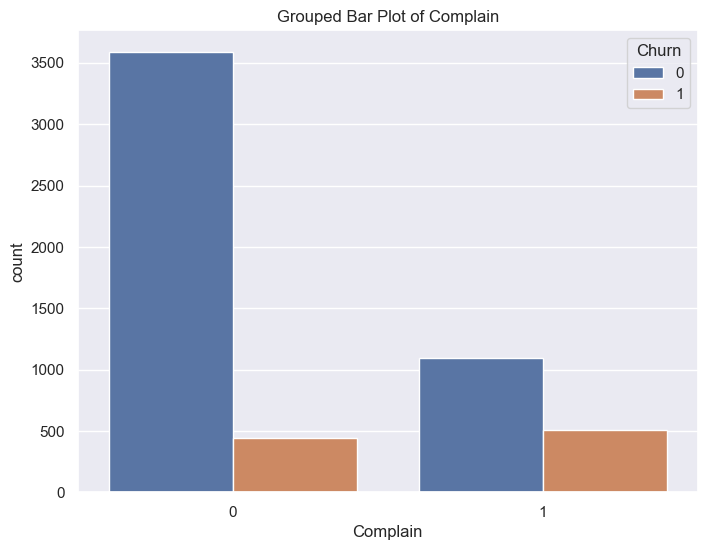

In [28]:
# Grouped bar plot
for feature in df_catgorical.columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, hue='Churn', data=df_catgorical)
    plt.title(f'Grouped Bar Plot of {feature}')
    plt.show()

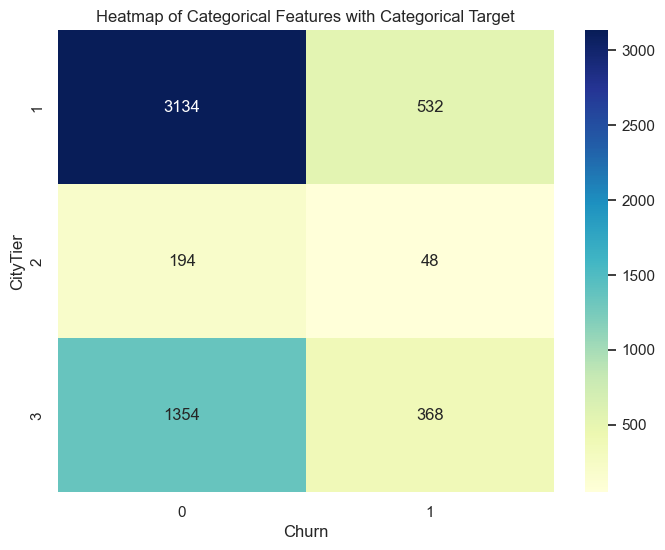

In [26]:
# Heatmap
# Create a cross-tabulation
cross_tab = pd.crosstab(df['CityTier'], df['Churn'])

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Heatmap of Categorical Features with Categorical Target')
plt.show()

# Insights

For Preprocessing:
1. One hot encoded cateogircal features to prepare for Iterative Imputer
2. Handle null values from the dataframe by dropping them or imputing them using Iterative Imputer whih is outlier-friendly, and can handle both numerical and cateogorical variables.
3. Add a copy of the dataset without the outliers and train models on two datases and compare.
4. Features Selection by removing multicollinear using Variational Inflation Factor for numerical features .
5. Standardize numerical features.